# Supervised Sequence Classification

While unsupervised methods can be powerful to identify antigen-specific sequences, being able to leverage known labels to guide the learning process can provide for better results, provided there is a sufficient amount of data to learn from. The first type of supervised learning we will explore within DeepTCR is being able to correctly classify a given TCR sequence to some label (i.e. its antigen specificity) from using its sequence information.

First we will load data from the Murine dataset which has TCR sequences from 9 murine antigens with beta-chain information including sequence, v-beta, and j-beta gene usage.

In [2]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_SS

# Instantiate training object
DTCR_SS = DeepTCR_SS('Tutorial')

#Load Data from directories
DTCR_SS.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

We will then train the sequence classifier as follows. First, we will split the dataset into a train,validation,and independent test cohort so we can assess how generalizable our model will be to new unseen data.And then we will train our sequene classifier. Our test_size parameter will tell DeepTCR how much of the data to leave out for valid/test which is split evenly across these two.

In [5]:
DTCR_SS.Get_Train_Valid_Test(test_size=0.25)
DTCR_SS.Train()

Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.16488 Validation loss: 2.13956 Testing loss: 2.12654 Training Accuracy: 0.12665 Validation Accuracy: 0.19344 Testing AUC: 0.52633
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.12084 Validation loss: 2.10018 Testing loss: 2.08828 Training Accuracy: 0.21208 Validation Accuracy: 0.27213 Testing AUC: 0.54231
Training_Statistics: 
 Epoch: 3/10000 Training loss: 2.08269 Validation loss: 2.06239 Testing loss: 2.05144 Training Accuracy: 0.29342 Validation Accuracy: 0.34098 Testing AUC: 0.56119
Training_Statistics: 
 Epoch: 4/10000 Training loss: 2.04549 Validation loss: 2.02580 Testing loss: 2.01567 Training Accuracy: 0.34675 Validation Accuracy: 0.38361 Testing AUC: 0.57967
Training_Statistics: 
 Epoch: 5/10000 Training loss: 2.00598 Validation loss: 1.99055 Testing loss: 1.98102 Training Accuracy: 0.38449 Validation Accuracy: 0.40328 Testing AUC: 0.59434
Training_Statistics: 
 Epoch: 6/10000 Training loss: 1.97173 Validation los

Training_Statistics: 
 Epoch: 50/10000 Training loss: 1.42476 Validation loss: 1.47177 Testing loss: 1.47741 Training Accuracy: 0.50184 Validation Accuracy: 0.5082 Testing AUC: 0.80091
Training_Statistics: 
 Epoch: 51/10000 Training loss: 1.41600 Validation loss: 1.46649 Testing loss: 1.47212 Training Accuracy: 0.50781 Validation Accuracy: 0.51148 Testing AUC: 0.80155
Training_Statistics: 
 Epoch: 52/10000 Training loss: 1.40895 Validation loss: 1.46134 Testing loss: 1.46698 Training Accuracy: 0.50773 Validation Accuracy: 0.51475 Testing AUC: 0.80271
Training_Statistics: 
 Epoch: 53/10000 Training loss: 1.40420 Validation loss: 1.45618 Testing loss: 1.46171 Training Accuracy: 0.5082 Validation Accuracy: 0.51803 Testing AUC: 0.80369
Training_Statistics: 
 Epoch: 54/10000 Training loss: 1.39708 Validation loss: 1.45118 Testing loss: 1.45652 Training Accuracy: 0.51123 Validation Accuracy: 0.51803 Testing AUC: 0.80491
Training_Statistics: 
 Epoch: 55/10000 Training loss: 1.39498 Validation

Training_Statistics: 
 Epoch: 100/10000 Training loss: 1.16104 Validation loss: 1.31443 Testing loss: 1.30836 Training Accuracy: 0.6014 Validation Accuracy: 0.55738 Testing AUC: 0.82782
Training_Statistics: 
 Epoch: 101/10000 Training loss: 1.15447 Validation loss: 1.31317 Testing loss: 1.30690 Training Accuracy: 0.60458 Validation Accuracy: 0.55738 Testing AUC: 0.82783
Training_Statistics: 
 Epoch: 102/10000 Training loss: 1.15370 Validation loss: 1.31184 Testing loss: 1.30559 Training Accuracy: 0.60859 Validation Accuracy: 0.5541 Testing AUC: 0.82813
Training_Statistics: 
 Epoch: 103/10000 Training loss: 1.14741 Validation loss: 1.31088 Testing loss: 1.30443 Training Accuracy: 0.60694 Validation Accuracy: 0.5541 Testing AUC: 0.82804
Training_Statistics: 
 Epoch: 104/10000 Training loss: 1.14066 Validation loss: 1.30968 Testing loss: 1.30308 Training Accuracy: 0.60923 Validation Accuracy: 0.5541 Testing AUC: 0.82814
Training_Statistics: 
 Epoch: 105/10000 Training loss: 1.14162 Valida

When we are done training, we can assess how well our classifier performs on the independent test set via looking at the ROC curves.

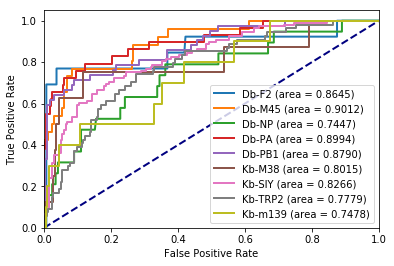

In [6]:
DTCR_SS.AUC_Curve()

We can also train our classifier with two other methods that allow for multiple iterations including a Monte Carlo method and K-Fold Cross-Validation Method.

For the Monte-Carlo method, we will specify the number of times we want to train train the classifier and the test size we want for each iteration. Of note, all parameters available for the Train method are also inputs for the Monte-Carlo and K-Fold Cross-Validation method.

In [8]:
DTCR_SS.Monte_Carlo_CrossVal(test_size=0.25,folds=5)

0
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.23572 Validation loss: 2.18756 Testing loss: 2.21335 Training Accuracy: 0.050162 Validation Accuracy: 0.085246 Testing AUC: 0.52086
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.18891 Validation loss: 2.14593 Testing loss: 2.17172 Training Accuracy: 0.099006 Validation Accuracy: 0.18361 Testing AUC: 0.53694
Training_Statistics: 
 Epoch: 3/10000 Training loss: 2.14548 Validation loss: 2.10617 Testing loss: 2.13239 Training Accuracy: 0.17621 Validation Accuracy: 0.22951 Testing AUC: 0.55427
Training_Statistics: 
 Epoch: 4/10000 Training loss: 2.10408 Validation loss: 2.06882 Testing loss: 2.09556 Training Accuracy: 0.25177 Validation Accuracy: 0.2623 Testing AUC: 0.56967
Training_Statistics: 
 Epoch: 5/10000 Training loss: 2.06723 Validation loss: 2.03388 Testing loss: 2.06099 Training Accuracy: 0.27302 Validation Accuracy: 0.31148 Testing AUC: 0.58625
Training_Statistics: 
 Epoch: 6/10000 Training loss: 2.03113 Validation

Training_Statistics: 
 Epoch: 50/10000 Training loss: 1.41604 Validation loss: 1.45380 Testing loss: 1.47833 Training Accuracy: 0.50513 Validation Accuracy: 0.46885 Testing AUC: 0.79642
Training_Statistics: 
 Epoch: 51/10000 Training loss: 1.40828 Validation loss: 1.44796 Testing loss: 1.47225 Training Accuracy: 0.50881 Validation Accuracy: 0.47213 Testing AUC: 0.79758
Training_Statistics: 
 Epoch: 52/10000 Training loss: 1.40095 Validation loss: 1.44224 Testing loss: 1.46633 Training Accuracy: 0.51063 Validation Accuracy: 0.47869 Testing AUC: 0.7985
Training_Statistics: 
 Epoch: 53/10000 Training loss: 1.39291 Validation loss: 1.43677 Testing loss: 1.46059 Training Accuracy: 0.51059 Validation Accuracy: 0.47869 Testing AUC: 0.79977
Training_Statistics: 
 Epoch: 54/10000 Training loss: 1.38795 Validation loss: 1.43150 Testing loss: 1.45496 Training Accuracy: 0.51274 Validation Accuracy: 0.48197 Testing AUC: 0.80088
Training_Statistics: 
 Epoch: 55/10000 Training loss: 1.38034 Validatio

Training_Statistics: 
 Epoch: 98/10000 Training loss: 1.17604 Validation loss: 1.30990 Testing loss: 1.31574 Training Accuracy: 0.58769 Validation Accuracy: 0.54098 Testing AUC: 0.82987
Training_Statistics: 
 Epoch: 99/10000 Training loss: 1.17361 Validation loss: 1.30853 Testing loss: 1.31434 Training Accuracy: 0.58808 Validation Accuracy: 0.54098 Testing AUC: 0.83001
Training_Statistics: 
 Epoch: 100/10000 Training loss: 1.16745 Validation loss: 1.30731 Testing loss: 1.31289 Training Accuracy: 0.5894 Validation Accuracy: 0.54098 Testing AUC: 0.83047
Training_Statistics: 
 Epoch: 101/10000 Training loss: 1.16357 Validation loss: 1.30604 Testing loss: 1.31176 Training Accuracy: 0.58965 Validation Accuracy: 0.54426 Testing AUC: 0.83054
Training_Statistics: 
 Epoch: 102/10000 Training loss: 1.15976 Validation loss: 1.30530 Testing loss: 1.31069 Training Accuracy: 0.59258 Validation Accuracy: 0.54098 Testing AUC: 0.83085
Training_Statistics: 
 Epoch: 103/10000 Training loss: 1.15448 Valid

Training_Statistics: 
 Epoch: 7/10000 Training loss: 2.02264 Validation loss: 1.99034 Testing loss: 2.00802 Training Accuracy: 0.38241 Validation Accuracy: 0.40328 Testing AUC: 0.59933
Training_Statistics: 
 Epoch: 8/10000 Training loss: 1.98863 Validation loss: 1.95896 Testing loss: 1.97822 Training Accuracy: 0.39459 Validation Accuracy: 0.4 Testing AUC: 0.60964
Training_Statistics: 
 Epoch: 9/10000 Training loss: 1.95908 Validation loss: 1.92980 Testing loss: 1.95025 Training Accuracy: 0.39706 Validation Accuracy: 0.40656 Testing AUC: 0.62033
Training_Statistics: 
 Epoch: 10/10000 Training loss: 1.92933 Validation loss: 1.90283 Testing loss: 1.92415 Training Accuracy: 0.4087 Validation Accuracy: 0.40984 Testing AUC: 0.62989
Training_Statistics: 
 Epoch: 11/10000 Training loss: 1.90272 Validation loss: 1.87736 Testing loss: 1.89980 Training Accuracy: 0.40981 Validation Accuracy: 0.41311 Testing AUC: 0.63849
Training_Statistics: 
 Epoch: 12/10000 Training loss: 1.87581 Validation loss:

Training_Statistics: 
 Epoch: 57/10000 Training loss: 1.36758 Validation loss: 1.39221 Testing loss: 1.46927 Training Accuracy: 0.5202 Validation Accuracy: 0.49836 Testing AUC: 0.76877
Training_Statistics: 
 Epoch: 58/10000 Training loss: 1.35870 Validation loss: 1.38674 Testing loss: 1.46505 Training Accuracy: 0.52335 Validation Accuracy: 0.49508 Testing AUC: 0.76997
Training_Statistics: 
 Epoch: 59/10000 Training loss: 1.35261 Validation loss: 1.38137 Testing loss: 1.46096 Training Accuracy: 0.52524 Validation Accuracy: 0.49508 Testing AUC: 0.7713
Training_Statistics: 
 Epoch: 60/10000 Training loss: 1.34392 Validation loss: 1.37611 Testing loss: 1.45689 Training Accuracy: 0.52738 Validation Accuracy: 0.49508 Testing AUC: 0.77222
Training_Statistics: 
 Epoch: 61/10000 Training loss: 1.33991 Validation loss: 1.37083 Testing loss: 1.45283 Training Accuracy: 0.53167 Validation Accuracy: 0.49836 Testing AUC: 0.77339
Training_Statistics: 
 Epoch: 62/10000 Training loss: 1.33208 Validation

Training_Statistics: 
 Epoch: 106/10000 Training loss: 1.14210 Validation loss: 1.23146 Testing loss: 1.34793 Training Accuracy: 0.5939 Validation Accuracy: 0.5541 Testing AUC: 0.81065
Training_Statistics: 
 Epoch: 107/10000 Training loss: 1.13408 Validation loss: 1.23013 Testing loss: 1.34656 Training Accuracy: 0.5978 Validation Accuracy: 0.5541 Testing AUC: 0.81141
Training_Statistics: 
 Epoch: 108/10000 Training loss: 1.13045 Validation loss: 1.22898 Testing loss: 1.34531 Training Accuracy: 0.60013 Validation Accuracy: 0.55738 Testing AUC: 0.81202
Training_Statistics: 
 Epoch: 109/10000 Training loss: 1.13053 Validation loss: 1.22796 Testing loss: 1.34428 Training Accuracy: 0.59951 Validation Accuracy: 0.56393 Testing AUC: 0.81252
Training_Statistics: 
 Epoch: 110/10000 Training loss: 1.13267 Validation loss: 1.22692 Testing loss: 1.34323 Training Accuracy: 0.59865 Validation Accuracy: 0.56393 Testing AUC: 0.81322
Training_Statistics: 
 Epoch: 111/10000 Training loss: 1.12241 Valida

Training_Statistics: 
 Epoch: 150/10000 Training loss: 1.03265 Validation loss: 1.20480 Testing loss: 1.31804 Training Accuracy: 0.63263 Validation Accuracy: 0.57377 Testing AUC: 0.82475
Done Training
Accuracy = 0.5663430420711975
2
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.18187 Validation loss: 2.14194 Testing loss: 2.15411 Training Accuracy: 0.086673 Validation Accuracy: 0.10492 Testing AUC: 0.51725
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.13502 Validation loss: 2.10082 Testing loss: 2.11135 Training Accuracy: 0.12454 Validation Accuracy: 0.15738 Testing AUC: 0.53556
Training_Statistics: 
 Epoch: 3/10000 Training loss: 2.09243 Validation loss: 2.06334 Testing loss: 2.07227 Training Accuracy: 0.19729 Validation Accuracy: 0.26557 Testing AUC: 0.55216
Training_Statistics: 
 Epoch: 4/10000 Training loss: 2.05366 Validation loss: 2.02782 Testing loss: 2.03509 Training Accuracy: 0.30049 Validation Accuracy: 0.34754 Testing AUC: 0.56751
Training_Statistics: 
 Epo

Training_Statistics: 
 Epoch: 49/10000 Training loss: 1.41162 Validation loss: 1.49987 Testing loss: 1.46532 Training Accuracy: 0.51231 Validation Accuracy: 0.47213 Testing AUC: 0.79065
Training_Statistics: 
 Epoch: 50/10000 Training loss: 1.40407 Validation loss: 1.49464 Testing loss: 1.45954 Training Accuracy: 0.51413 Validation Accuracy: 0.47869 Testing AUC: 0.79145
Training_Statistics: 
 Epoch: 51/10000 Training loss: 1.39252 Validation loss: 1.48951 Testing loss: 1.45385 Training Accuracy: 0.51806 Validation Accuracy: 0.47869 Testing AUC: 0.79251
Training_Statistics: 
 Epoch: 52/10000 Training loss: 1.38815 Validation loss: 1.48456 Testing loss: 1.44813 Training Accuracy: 0.51978 Validation Accuracy: 0.48197 Testing AUC: 0.79323
Training_Statistics: 
 Epoch: 53/10000 Training loss: 1.38047 Validation loss: 1.47968 Testing loss: 1.44259 Training Accuracy: 0.52074 Validation Accuracy: 0.48197 Testing AUC: 0.7945
Training_Statistics: 
 Epoch: 54/10000 Training loss: 1.37405 Validatio

Training_Statistics: 
 Epoch: 97/10000 Training loss: 1.16090 Validation loss: 1.36092 Testing loss: 1.30599 Training Accuracy: 0.60176 Validation Accuracy: 0.5377 Testing AUC: 0.82055
Training_Statistics: 
 Epoch: 98/10000 Training loss: 1.15873 Validation loss: 1.35974 Testing loss: 1.30523 Training Accuracy: 0.60258 Validation Accuracy: 0.54098 Testing AUC: 0.82083
Training_Statistics: 
 Epoch: 99/10000 Training loss: 1.15150 Validation loss: 1.35879 Testing loss: 1.30433 Training Accuracy: 0.60437 Validation Accuracy: 0.54098 Testing AUC: 0.821
Training_Statistics: 
 Epoch: 100/10000 Training loss: 1.15331 Validation loss: 1.35804 Testing loss: 1.30321 Training Accuracy: 0.6048 Validation Accuracy: 0.54098 Testing AUC: 0.82119
Training_Statistics: 
 Epoch: 101/10000 Training loss: 1.14605 Validation loss: 1.35715 Testing loss: 1.30208 Training Accuracy: 0.60656 Validation Accuracy: 0.54426 Testing AUC: 0.8214
Training_Statistics: 
 Epoch: 102/10000 Training loss: 1.14511 Validation

Training_Statistics: 
 Epoch: 15/10000 Training loss: 1.73856 Validation loss: 1.73802 Testing loss: 1.72821 Training Accuracy: 0.42463 Validation Accuracy: 0.41311 Testing AUC: 0.69934
Training_Statistics: 
 Epoch: 16/10000 Training loss: 1.72844 Validation loss: 1.72737 Testing loss: 1.71824 Training Accuracy: 0.42592 Validation Accuracy: 0.41311 Testing AUC: 0.70623
Training_Statistics: 
 Epoch: 17/10000 Training loss: 1.71440 Validation loss: 1.71731 Testing loss: 1.70876 Training Accuracy: 0.42703 Validation Accuracy: 0.41967 Testing AUC: 0.71279
Training_Statistics: 
 Epoch: 18/10000 Training loss: 1.70249 Validation loss: 1.70690 Testing loss: 1.69883 Training Accuracy: 0.4281 Validation Accuracy: 0.42295 Testing AUC: 0.71899
Training_Statistics: 
 Epoch: 19/10000 Training loss: 1.69184 Validation loss: 1.69674 Testing loss: 1.68905 Training Accuracy: 0.42793 Validation Accuracy: 0.42623 Testing AUC: 0.72374
Training_Statistics: 
 Epoch: 20/10000 Training loss: 1.68254 Validatio

Training_Statistics: 
 Epoch: 63/10000 Training loss: 1.34976 Validation loss: 1.41012 Testing loss: 1.38880 Training Accuracy: 0.54307 Validation Accuracy: 0.49836 Testing AUC: 0.81556
Training_Statistics: 
 Epoch: 64/10000 Training loss: 1.34252 Validation loss: 1.40616 Testing loss: 1.38446 Training Accuracy: 0.54221 Validation Accuracy: 0.50164 Testing AUC: 0.81625
Training_Statistics: 
 Epoch: 65/10000 Training loss: 1.33592 Validation loss: 1.40218 Testing loss: 1.38005 Training Accuracy: 0.5455 Validation Accuracy: 0.50492 Testing AUC: 0.81748
Training_Statistics: 
 Epoch: 66/10000 Training loss: 1.33401 Validation loss: 1.39854 Testing loss: 1.37581 Training Accuracy: 0.54535 Validation Accuracy: 0.5082 Testing AUC: 0.81854
Training_Statistics: 
 Epoch: 67/10000 Training loss: 1.32959 Validation loss: 1.39495 Testing loss: 1.37161 Training Accuracy: 0.54903 Validation Accuracy: 0.5082 Testing AUC: 0.8194
Training_Statistics: 
 Epoch: 68/10000 Training loss: 1.31874 Validation l

Training_Statistics: 
 Epoch: 108/10000 Training loss: 1.17340 Validation loss: 1.31583 Testing loss: 1.25676 Training Accuracy: 0.59179 Validation Accuracy: 0.5377 Testing AUC: 0.84722
Training_Statistics: 
 Epoch: 109/10000 Training loss: 1.16791 Validation loss: 1.31495 Testing loss: 1.25503 Training Accuracy: 0.5943 Validation Accuracy: 0.53443 Testing AUC: 0.84779
Training_Statistics: 
 Epoch: 110/10000 Training loss: 1.16338 Validation loss: 1.31426 Testing loss: 1.25322 Training Accuracy: 0.59519 Validation Accuracy: 0.5377 Testing AUC: 0.84834
Training_Statistics: 
 Epoch: 111/10000 Training loss: 1.15871 Validation loss: 1.31369 Testing loss: 1.25156 Training Accuracy: 0.59827 Validation Accuracy: 0.5377 Testing AUC: 0.84881
Training_Statistics: 
 Epoch: 112/10000 Training loss: 1.16033 Validation loss: 1.31296 Testing loss: 1.24972 Training Accuracy: 0.59862 Validation Accuracy: 0.5377 Testing AUC: 0.84957
Training_Statistics: 
 Epoch: 113/10000 Training loss: 1.16123 Validat

Training_Statistics: 
 Epoch: 15/10000 Training loss: 1.76947 Validation loss: 1.75637 Testing loss: 1.78485 Training Accuracy: 0.35758 Validation Accuracy: 0.3541 Testing AUC: 0.69396
Training_Statistics: 
 Epoch: 16/10000 Training loss: 1.75441 Validation loss: 1.74089 Testing loss: 1.77099 Training Accuracy: 0.3564 Validation Accuracy: 0.3541 Testing AUC: 0.70008
Training_Statistics: 
 Epoch: 17/10000 Training loss: 1.73743 Validation loss: 1.72644 Testing loss: 1.75785 Training Accuracy: 0.35819 Validation Accuracy: 0.36721 Testing AUC: 0.70462
Training_Statistics: 
 Epoch: 18/10000 Training loss: 1.72449 Validation loss: 1.71290 Testing loss: 1.74538 Training Accuracy: 0.36276 Validation Accuracy: 0.38033 Testing AUC: 0.71038
Training_Statistics: 
 Epoch: 19/10000 Training loss: 1.71313 Validation loss: 1.69998 Testing loss: 1.73326 Training Accuracy: 0.3729 Validation Accuracy: 0.38689 Testing AUC: 0.71563
Training_Statistics: 
 Epoch: 20/10000 Training loss: 1.69647 Validation l

Training_Statistics: 
 Epoch: 64/10000 Training loss: 1.33562 Validation loss: 1.39675 Testing loss: 1.41378 Training Accuracy: 0.5446 Validation Accuracy: 0.51803 Testing AUC: 0.82237
Training_Statistics: 
 Epoch: 65/10000 Training loss: 1.32960 Validation loss: 1.39377 Testing loss: 1.40988 Training Accuracy: 0.54892 Validation Accuracy: 0.51803 Testing AUC: 0.82332
Training_Statistics: 
 Epoch: 66/10000 Training loss: 1.32084 Validation loss: 1.39065 Testing loss: 1.40600 Training Accuracy: 0.554 Validation Accuracy: 0.51803 Testing AUC: 0.82432
Training_Statistics: 
 Epoch: 67/10000 Training loss: 1.31649 Validation loss: 1.38768 Testing loss: 1.40236 Training Accuracy: 0.55593 Validation Accuracy: 0.52131 Testing AUC: 0.82485
Training_Statistics: 
 Epoch: 68/10000 Training loss: 1.30942 Validation loss: 1.38465 Testing loss: 1.39881 Training Accuracy: 0.5574 Validation Accuracy: 0.53443 Testing AUC: 0.8255
Training_Statistics: 
 Epoch: 69/10000 Training loss: 1.30696 Validation lo

Training_Statistics: 
 Epoch: 110/10000 Training loss: 1.14779 Validation loss: 1.32025 Testing loss: 1.30739 Training Accuracy: 0.60584 Validation Accuracy: 0.5541 Testing AUC: 0.8393
Training_Statistics: 
 Epoch: 111/10000 Training loss: 1.14957 Validation loss: 1.31954 Testing loss: 1.30614 Training Accuracy: 0.60648 Validation Accuracy: 0.5541 Testing AUC: 0.83975
Training_Statistics: 
 Epoch: 112/10000 Training loss: 1.14492 Validation loss: 1.31881 Testing loss: 1.30497 Training Accuracy: 0.60987 Validation Accuracy: 0.5541 Testing AUC: 0.84021
Training_Statistics: 
 Epoch: 113/10000 Training loss: 1.14221 Validation loss: 1.31796 Testing loss: 1.30398 Training Accuracy: 0.60919 Validation Accuracy: 0.5541 Testing AUC: 0.84029
Training_Statistics: 
 Epoch: 114/10000 Training loss: 1.14195 Validation loss: 1.31729 Testing loss: 1.30304 Training Accuracy: 0.61062 Validation Accuracy: 0.55082 Testing AUC: 0.84085
Training_Statistics: 
 Epoch: 115/10000 Training loss: 1.13176 Validat

Training_Statistics: 
 Epoch: 160/10000 Training loss: 1.02956 Validation loss: 1.29362 Testing loss: 1.27993 Training Accuracy: 0.64128 Validation Accuracy: 0.57049 Testing AUC: 0.85002
Training_Statistics: 
 Epoch: 161/10000 Training loss: 1.02708 Validation loss: 1.29337 Testing loss: 1.28004 Training Accuracy: 0.64156 Validation Accuracy: 0.57049 Testing AUC: 0.85006
Training_Statistics: 
 Epoch: 162/10000 Training loss: 1.02317 Validation loss: 1.29314 Testing loss: 1.27993 Training Accuracy: 0.64207 Validation Accuracy: 0.57049 Testing AUC: 0.85013
Training_Statistics: 
 Epoch: 163/10000 Training loss: 1.02095 Validation loss: 1.29309 Testing loss: 1.28045 Training Accuracy: 0.64421 Validation Accuracy: 0.57049 Testing AUC: 0.85041
Training_Statistics: 
 Epoch: 164/10000 Training loss: 1.01895 Validation loss: 1.29275 Testing loss: 1.28045 Training Accuracy: 0.64568 Validation Accuracy: 0.57049 Testing AUC: 0.8507
Training_Statistics: 
 Epoch: 165/10000 Training loss: 1.02243 Val

Once again, we can view the AUC curve.

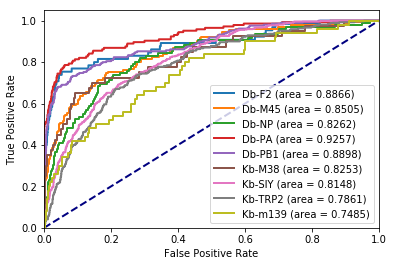

In [9]:
DTCR_SS.AUC_Curve()

To run a K-fold cross validation with 5 folds of the data, fun the following command. In this case, no test_size is required as the algorithm is trained on the entirety of the train folds and tested on the out-fold.

In [10]:
DTCR_SS.K_Fold_CrossVal(folds=5)

0
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.28026 Validation loss: 2.24520 Testing loss: 2.24520 Training Accuracy: 0.059105 Validation Accuracy: 0.080082 Testing AUC: 0.52768
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.23042 Validation loss: 2.20015 Testing loss: 2.20015 Training Accuracy: 0.072763 Validation Accuracy: 0.10472 Testing AUC: 0.54117
Training_Statistics: 
 Epoch: 3/10000 Training loss: 2.18622 Validation loss: 2.16007 Testing loss: 2.16007 Training Accuracy: 0.11863 Validation Accuracy: 0.14168 Testing AUC: 0.55534
Training_Statistics: 
 Epoch: 4/10000 Training loss: 2.14640 Validation loss: 2.12230 Testing loss: 2.12230 Training Accuracy: 0.17684 Validation Accuracy: 0.24435 Testing AUC: 0.56892
Training_Statistics: 
 Epoch: 5/10000 Training loss: 2.10786 Validation loss: 2.08697 Testing loss: 2.08697 Training Accuracy: 0.25997 Validation Accuracy: 0.30801 Testing AUC: 0.58247
Training_Statistics: 
 Epoch: 6/10000 Training loss: 2.07164 Validatio

Training_Statistics: 
 Epoch: 50/10000 Training loss: 1.39767 Validation loss: 1.47179 Testing loss: 1.47179 Training Accuracy: 0.53118 Validation Accuracy: 0.50719 Testing AUC: 0.78164
Training_Statistics: 
 Epoch: 51/10000 Training loss: 1.38969 Validation loss: 1.46613 Testing loss: 1.46613 Training Accuracy: 0.53489 Validation Accuracy: 0.51335 Testing AUC: 0.78339
Training_Statistics: 
 Epoch: 52/10000 Training loss: 1.38310 Validation loss: 1.46055 Testing loss: 1.46055 Training Accuracy: 0.53474 Validation Accuracy: 0.5154 Testing AUC: 0.78496
Training_Statistics: 
 Epoch: 53/10000 Training loss: 1.37537 Validation loss: 1.45510 Testing loss: 1.45510 Training Accuracy: 0.53808 Validation Accuracy: 0.51951 Testing AUC: 0.78653
Training_Statistics: 
 Epoch: 54/10000 Training loss: 1.36809 Validation loss: 1.44989 Testing loss: 1.44989 Training Accuracy: 0.54039 Validation Accuracy: 0.51951 Testing AUC: 0.78812
Training_Statistics: 
 Epoch: 55/10000 Training loss: 1.36237 Validatio

Training_Statistics: 
 Epoch: 98/10000 Training loss: 1.16541 Validation loss: 1.32338 Testing loss: 1.32338 Training Accuracy: 0.58358 Validation Accuracy: 0.54209 Testing AUC: 0.82645
Training_Statistics: 
 Epoch: 99/10000 Training loss: 1.16147 Validation loss: 1.32220 Testing loss: 1.32220 Training Accuracy: 0.58653 Validation Accuracy: 0.54209 Testing AUC: 0.82692
Training_Statistics: 
 Epoch: 100/10000 Training loss: 1.15896 Validation loss: 1.32068 Testing loss: 1.32068 Training Accuracy: 0.58647 Validation Accuracy: 0.54004 Testing AUC: 0.82722
Training_Statistics: 
 Epoch: 101/10000 Training loss: 1.15588 Validation loss: 1.31942 Testing loss: 1.31942 Training Accuracy: 0.58661 Validation Accuracy: 0.53799 Testing AUC: 0.82765
Training_Statistics: 
 Epoch: 102/10000 Training loss: 1.15301 Validation loss: 1.31809 Testing loss: 1.31809 Training Accuracy: 0.58661 Validation Accuracy: 0.54209 Testing AUC: 0.8282
Training_Statistics: 
 Epoch: 103/10000 Training loss: 1.15041 Valid

Training_Statistics: 
 Epoch: 146/10000 Training loss: 1.04018 Validation loss: 1.28511 Testing loss: 1.28511 Training Accuracy: 0.62987 Validation Accuracy: 0.54825 Testing AUC: 0.83788
Training_Statistics: 
 Epoch: 147/10000 Training loss: 1.03865 Validation loss: 1.28444 Testing loss: 1.28444 Training Accuracy: 0.63134 Validation Accuracy: 0.55031 Testing AUC: 0.83806
Training_Statistics: 
 Epoch: 148/10000 Training loss: 1.03619 Validation loss: 1.28421 Testing loss: 1.28421 Training Accuracy: 0.6325 Validation Accuracy: 0.54825 Testing AUC: 0.8382
Training_Statistics: 
 Epoch: 149/10000 Training loss: 1.03457 Validation loss: 1.28385 Testing loss: 1.28385 Training Accuracy: 0.63229 Validation Accuracy: 0.55236 Testing AUC: 0.83853
Training_Statistics: 
 Epoch: 150/10000 Training loss: 1.03212 Validation loss: 1.28385 Testing loss: 1.28385 Training Accuracy: 0.63413 Validation Accuracy: 0.55441 Testing AUC: 0.8386
Training_Statistics: 
 Epoch: 151/10000 Training loss: 1.02985 Valid

Training_Statistics: 
 Epoch: 29/10000 Training loss: 1.62510 Validation loss: 1.58136 Testing loss: 1.58136 Training Accuracy: 0.42934 Validation Accuracy: 0.4538 Testing AUC: 0.73703
Training_Statistics: 
 Epoch: 30/10000 Training loss: 1.61312 Validation loss: 1.57163 Testing loss: 1.57163 Training Accuracy: 0.43616 Validation Accuracy: 0.4538 Testing AUC: 0.73927
Training_Statistics: 
 Epoch: 31/10000 Training loss: 1.60356 Validation loss: 1.56239 Testing loss: 1.56239 Training Accuracy: 0.43863 Validation Accuracy: 0.45175 Testing AUC: 0.74191
Training_Statistics: 
 Epoch: 32/10000 Training loss: 1.59367 Validation loss: 1.55345 Testing loss: 1.55345 Training Accuracy: 0.44605 Validation Accuracy: 0.44353 Testing AUC: 0.74453
Training_Statistics: 
 Epoch: 33/10000 Training loss: 1.58396 Validation loss: 1.54498 Testing loss: 1.54498 Training Accuracy: 0.44703 Validation Accuracy: 0.44969 Testing AUC: 0.74681
Training_Statistics: 
 Epoch: 34/10000 Training loss: 1.57511 Validation

Training_Statistics: 
 Epoch: 77/10000 Training loss: 1.30282 Validation loss: 1.32779 Testing loss: 1.32779 Training Accuracy: 0.55682 Validation Accuracy: 0.54004 Testing AUC: 0.80208
Training_Statistics: 
 Epoch: 78/10000 Training loss: 1.29943 Validation loss: 1.32473 Testing loss: 1.32473 Training Accuracy: 0.55534 Validation Accuracy: 0.54004 Testing AUC: 0.80266
Training_Statistics: 
 Epoch: 79/10000 Training loss: 1.29427 Validation loss: 1.32189 Testing loss: 1.32189 Training Accuracy: 0.55711 Validation Accuracy: 0.54004 Testing AUC: 0.80366
Training_Statistics: 
 Epoch: 80/10000 Training loss: 1.29017 Validation loss: 1.31930 Testing loss: 1.31930 Training Accuracy: 0.56013 Validation Accuracy: 0.54004 Testing AUC: 0.80458
Training_Statistics: 
 Epoch: 81/10000 Training loss: 1.28741 Validation loss: 1.31649 Testing loss: 1.31649 Training Accuracy: 0.56111 Validation Accuracy: 0.54209 Testing AUC: 0.80536
Training_Statistics: 
 Epoch: 82/10000 Training loss: 1.28170 Validati

Training_Statistics: 
 Epoch: 123/10000 Training loss: 1.13472 Validation loss: 1.24189 Testing loss: 1.24189 Training Accuracy: 0.613 Validation Accuracy: 0.58111 Testing AUC: 0.82993
Training_Statistics: 
 Epoch: 124/10000 Training loss: 1.13255 Validation loss: 1.24062 Testing loss: 1.24062 Training Accuracy: 0.613 Validation Accuracy: 0.57906 Testing AUC: 0.8303
Training_Statistics: 
 Epoch: 125/10000 Training loss: 1.12805 Validation loss: 1.23973 Testing loss: 1.23973 Training Accuracy: 0.611 Validation Accuracy: 0.58111 Testing AUC: 0.83059
Training_Statistics: 
 Epoch: 126/10000 Training loss: 1.12491 Validation loss: 1.23877 Testing loss: 1.23877 Training Accuracy: 0.612 Validation Accuracy: 0.57906 Testing AUC: 0.83098
Training_Statistics: 
 Epoch: 127/10000 Training loss: 1.12220 Validation loss: 1.23775 Testing loss: 1.23775 Training Accuracy: 0.61374 Validation Accuracy: 0.5729 Testing AUC: 0.83134
Training_Statistics: 
 Epoch: 128/10000 Training loss: 1.11901 Validation l

Done Training
Accuracy = 0.5585215605749486
2
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.14454 Validation loss: 2.09833 Testing loss: 2.09833 Training Accuracy: 0.212 Validation Accuracy: 0.26283 Testing AUC: 0.5186
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.10059 Validation loss: 2.05766 Testing loss: 2.05766 Training Accuracy: 0.24363 Validation Accuracy: 0.3039 Testing AUC: 0.53578
Training_Statistics: 
 Epoch: 3/10000 Training loss: 2.05973 Validation loss: 2.01918 Testing loss: 2.01918 Training Accuracy: 0.30074 Validation Accuracy: 0.34086 Testing AUC: 0.55444
Training_Statistics: 
 Epoch: 4/10000 Training loss: 2.02027 Validation loss: 1.98297 Testing loss: 1.98297 Training Accuracy: 0.32697 Validation Accuracy: 0.34908 Testing AUC: 0.57323
Training_Statistics: 
 Epoch: 5/10000 Training loss: 1.98545 Validation loss: 1.94917 Testing loss: 1.94917 Training Accuracy: 0.34653 Validation Accuracy: 0.35934 Testing AUC: 0.59159
Training_Statistics: 
 Epoch: 6/1

Training_Statistics: 
 Epoch: 50/10000 Training loss: 1.39692 Validation loss: 1.44053 Testing loss: 1.44053 Training Accuracy: 0.52466 Validation Accuracy: 0.51745 Testing AUC: 0.79974
Training_Statistics: 
 Epoch: 51/10000 Training loss: 1.39021 Validation loss: 1.43475 Testing loss: 1.43475 Training Accuracy: 0.52724 Validation Accuracy: 0.51335 Testing AUC: 0.8011
Training_Statistics: 
 Epoch: 52/10000 Training loss: 1.38367 Validation loss: 1.42931 Testing loss: 1.42931 Training Accuracy: 0.53342 Validation Accuracy: 0.5154 Testing AUC: 0.80243
Training_Statistics: 
 Epoch: 53/10000 Training loss: 1.37537 Validation loss: 1.42387 Testing loss: 1.42387 Training Accuracy: 0.53437 Validation Accuracy: 0.51335 Testing AUC: 0.80368
Training_Statistics: 
 Epoch: 54/10000 Training loss: 1.36926 Validation loss: 1.41866 Testing loss: 1.41866 Training Accuracy: 0.53587 Validation Accuracy: 0.51745 Testing AUC: 0.80469
Training_Statistics: 
 Epoch: 55/10000 Training loss: 1.36344 Validation

Training_Statistics: 
 Epoch: 97/10000 Training loss: 1.15321 Validation loss: 1.27435 Testing loss: 1.27435 Training Accuracy: 0.60345 Validation Accuracy: 0.55852 Testing AUC: 0.83971
Training_Statistics: 
 Epoch: 98/10000 Training loss: 1.14915 Validation loss: 1.27250 Testing loss: 1.27250 Training Accuracy: 0.60437 Validation Accuracy: 0.56263 Testing AUC: 0.84037
Training_Statistics: 
 Epoch: 99/10000 Training loss: 1.14582 Validation loss: 1.27115 Testing loss: 1.27115 Training Accuracy: 0.60479 Validation Accuracy: 0.56468 Testing AUC: 0.8408
Training_Statistics: 
 Epoch: 100/10000 Training loss: 1.14150 Validation loss: 1.26939 Testing loss: 1.26939 Training Accuracy: 0.60639 Validation Accuracy: 0.56674 Testing AUC: 0.84134
Training_Statistics: 
 Epoch: 101/10000 Training loss: 1.13933 Validation loss: 1.26749 Testing loss: 1.26749 Training Accuracy: 0.60711 Validation Accuracy: 0.57084 Testing AUC: 0.84217
Training_Statistics: 
 Epoch: 102/10000 Training loss: 1.13564 Valida

Training_Statistics: 
 Epoch: 145/10000 Training loss: 1.01224 Validation loss: 1.22725 Testing loss: 1.22725 Training Accuracy: 0.64311 Validation Accuracy: 0.57495 Testing AUC: 0.8577
Training_Statistics: 
 Epoch: 146/10000 Training loss: 1.01130 Validation loss: 1.22708 Testing loss: 1.22708 Training Accuracy: 0.64311 Validation Accuracy: 0.57906 Testing AUC: 0.85799
Training_Statistics: 
 Epoch: 147/10000 Training loss: 1.00949 Validation loss: 1.22708 Testing loss: 1.22708 Training Accuracy: 0.64242 Validation Accuracy: 0.577 Testing AUC: 0.85809
Training_Statistics: 
 Epoch: 148/10000 Training loss: 1.00646 Validation loss: 1.22653 Testing loss: 1.22653 Training Accuracy: 0.64445 Validation Accuracy: 0.57495 Testing AUC: 0.85815
Training_Statistics: 
 Epoch: 149/10000 Training loss: 1.00445 Validation loss: 1.22616 Testing loss: 1.22616 Training Accuracy: 0.64858 Validation Accuracy: 0.577 Testing AUC: 0.85835
Training_Statistics: 
 Epoch: 150/10000 Training loss: 1.00139 Validat

Training_Statistics: 
 Epoch: 36/10000 Training loss: 1.50519 Validation loss: 1.59347 Testing loss: 1.59347 Training Accuracy: 0.49247 Validation Accuracy: 0.46817 Testing AUC: 0.75736
Training_Statistics: 
 Epoch: 37/10000 Training loss: 1.49614 Validation loss: 1.58573 Testing loss: 1.58573 Training Accuracy: 0.49611 Validation Accuracy: 0.46612 Testing AUC: 0.7597
Training_Statistics: 
 Epoch: 38/10000 Training loss: 1.48755 Validation loss: 1.57826 Testing loss: 1.57826 Training Accuracy: 0.49779 Validation Accuracy: 0.47228 Testing AUC: 0.76195
Training_Statistics: 
 Epoch: 39/10000 Training loss: 1.47883 Validation loss: 1.57075 Testing loss: 1.57075 Training Accuracy: 0.50224 Validation Accuracy: 0.47228 Testing AUC: 0.76382
Training_Statistics: 
 Epoch: 40/10000 Training loss: 1.47014 Validation loss: 1.56349 Testing loss: 1.56349 Training Accuracy: 0.50863 Validation Accuracy: 0.47433 Testing AUC: 0.76568
Training_Statistics: 
 Epoch: 41/10000 Training loss: 1.46109 Validatio

Training_Statistics: 
 Epoch: 85/10000 Training loss: 1.20228 Validation loss: 1.37061 Testing loss: 1.37061 Training Accuracy: 0.58616 Validation Accuracy: 0.53799 Testing AUC: 0.80922
Training_Statistics: 
 Epoch: 86/10000 Training loss: 1.19691 Validation loss: 1.36844 Testing loss: 1.36844 Training Accuracy: 0.58821 Validation Accuracy: 0.54209 Testing AUC: 0.80962
Training_Statistics: 
 Epoch: 87/10000 Training loss: 1.19268 Validation loss: 1.36647 Testing loss: 1.36647 Training Accuracy: 0.59145 Validation Accuracy: 0.54209 Testing AUC: 0.81006
Training_Statistics: 
 Epoch: 88/10000 Training loss: 1.18890 Validation loss: 1.36434 Testing loss: 1.36434 Training Accuracy: 0.59324 Validation Accuracy: 0.54415 Testing AUC: 0.81045
Training_Statistics: 
 Epoch: 89/10000 Training loss: 1.18593 Validation loss: 1.36245 Testing loss: 1.36245 Training Accuracy: 0.59358 Validation Accuracy: 0.54415 Testing AUC: 0.81109
Training_Statistics: 
 Epoch: 90/10000 Training loss: 1.18102 Validati

Training_Statistics: 
 Epoch: 134/10000 Training loss: 1.03843 Validation loss: 1.32017 Testing loss: 1.32017 Training Accuracy: 0.63434 Validation Accuracy: 0.54415 Testing AUC: 0.82267
Done Training
Accuracy = 0.5605749486652978
4
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.12231 Validation loss: 2.08619 Testing loss: 2.08619 Training Accuracy: 0.1953 Validation Accuracy: 0.21881 Testing AUC: 0.59431
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.08267 Validation loss: 2.05162 Testing loss: 2.05162 Training Accuracy: 0.23037 Validation Accuracy: 0.24335 Testing AUC: 0.60752
Training_Statistics: 
 Epoch: 3/10000 Training loss: 2.04589 Validation loss: 2.01810 Testing loss: 2.01810 Training Accuracy: 0.2766 Validation Accuracy: 0.28834 Testing AUC: 0.62004
Training_Statistics: 
 Epoch: 4/10000 Training loss: 2.00945 Validation loss: 1.98533 Testing loss: 1.98533 Training Accuracy: 0.33313 Validation Accuracy: 0.33538 Testing AUC: 0.63363
Training_Statistics: 
 Epoch:

Training_Statistics: 
 Epoch: 44/10000 Training loss: 1.44466 Validation loss: 1.50322 Testing loss: 1.50322 Training Accuracy: 0.50586 Validation Accuracy: 0.43967 Testing AUC: 0.80823
Training_Statistics: 
 Epoch: 45/10000 Training loss: 1.43735 Validation loss: 1.49761 Testing loss: 1.49761 Training Accuracy: 0.51043 Validation Accuracy: 0.44172 Testing AUC: 0.80979
Training_Statistics: 
 Epoch: 46/10000 Training loss: 1.43183 Validation loss: 1.49237 Testing loss: 1.49237 Training Accuracy: 0.51358 Validation Accuracy: 0.44581 Testing AUC: 0.81104
Training_Statistics: 
 Epoch: 47/10000 Training loss: 1.42420 Validation loss: 1.48706 Testing loss: 1.48706 Training Accuracy: 0.51666 Validation Accuracy: 0.45194 Testing AUC: 0.81192
Training_Statistics: 
 Epoch: 48/10000 Training loss: 1.41875 Validation loss: 1.48183 Testing loss: 1.48183 Training Accuracy: 0.51908 Validation Accuracy: 0.45194 Testing AUC: 0.81273
Training_Statistics: 
 Epoch: 49/10000 Training loss: 1.41141 Validati

Training_Statistics: 
 Epoch: 92/10000 Training loss: 1.20711 Validation loss: 1.33300 Testing loss: 1.33300 Training Accuracy: 0.59522 Validation Accuracy: 0.51125 Testing AUC: 0.83737
Training_Statistics: 
 Epoch: 93/10000 Training loss: 1.20353 Validation loss: 1.33103 Testing loss: 1.33103 Training Accuracy: 0.59644 Validation Accuracy: 0.5092 Testing AUC: 0.83767
Training_Statistics: 
 Epoch: 94/10000 Training loss: 1.20079 Validation loss: 1.32944 Testing loss: 1.32944 Training Accuracy: 0.5973 Validation Accuracy: 0.51125 Testing AUC: 0.838
Training_Statistics: 
 Epoch: 95/10000 Training loss: 1.19669 Validation loss: 1.32777 Testing loss: 1.32777 Training Accuracy: 0.59766 Validation Accuracy: 0.51329 Testing AUC: 0.83845
Training_Statistics: 
 Epoch: 96/10000 Training loss: 1.19380 Validation loss: 1.32618 Testing loss: 1.32618 Training Accuracy: 0.59777 Validation Accuracy: 0.5092 Testing AUC: 0.83885
Training_Statistics: 
 Epoch: 97/10000 Training loss: 1.19074 Validation lo

Training_Statistics: 
 Epoch: 137/10000 Training loss: 1.07700 Validation loss: 1.28763 Testing loss: 1.28763 Training Accuracy: 0.62937 Validation Accuracy: 0.54601 Testing AUC: 0.84894
Training_Statistics: 
 Epoch: 138/10000 Training loss: 1.07472 Validation loss: 1.28729 Testing loss: 1.28729 Training Accuracy: 0.62818 Validation Accuracy: 0.54806 Testing AUC: 0.849
Training_Statistics: 
 Epoch: 139/10000 Training loss: 1.07119 Validation loss: 1.28723 Testing loss: 1.28723 Training Accuracy: 0.63046 Validation Accuracy: 0.55215 Testing AUC: 0.84909
Training_Statistics: 
 Epoch: 140/10000 Training loss: 1.06996 Validation loss: 1.28728 Testing loss: 1.28728 Training Accuracy: 0.63157 Validation Accuracy: 0.55215 Testing AUC: 0.84922
Training_Statistics: 
 Epoch: 141/10000 Training loss: 1.06734 Validation loss: 1.28708 Testing loss: 1.28708 Training Accuracy: 0.63199 Validation Accuracy: 0.55419 Testing AUC: 0.84927
Training_Statistics: 
 Epoch: 142/10000 Training loss: 1.06393 Vali

Once our algorithm has been trained, we may want to see which sequences are the most strongly predicted for each label. To do this we will run the following command. The output of the command is a dictionary of dataframes within the object we can view. 

In [11]:
DTCR_SS.Representative_Sequences()

In [13]:
print(DTCR_SS.Rep_Seq['Db-F2'])

   alpha             beta      v_beta d_beta      j_beta v_alpha j_alpha  \
21  None   CASSPGQDYTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
0   None    CASSPGDYAEQFF  TCRBV19-03   None  TCRBJ02-01    None    None   
28  None    CASSPGQNTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
35  None  CASSVGTLNYAEQFF  TCRBV19-03   None  TCRBJ02-01    None    None   
11  None   CASSPGTGDTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
41  None    CASSSGDYAEQFF  TCRBV19-03   None  TCRBJ02-01    None    None   
20  None  CASSPGTGGVTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
14  None    CASSPGTDTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
39  None   CASSSGTGYTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
18  None    CASSPGQYTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   

    Class     Sample      Freq  Counts     Db-F2    Db-M45     Db-NP  \
21  Db-F2  Db-F2.tsv  0.008547       1  0.779007  0.020969  0.016949   
0   Db-F2  Db-F2.ts

Furthermore, we may want to know which learned motifs are associated with a given label. To do this, we can run the following command with the label we want to know the predictive motifs for.

In [14]:
DTCR_SS.Motif_Identification('Db-F2')

Motif Identification Completed


The motifs can then be found in fasta files in the results folder underneath (label)_(alpha/beta)_Motifs. These fasta fiels can then be used with "https://weblogo.berkeley.edu/logo.cgi" for motif visualization.